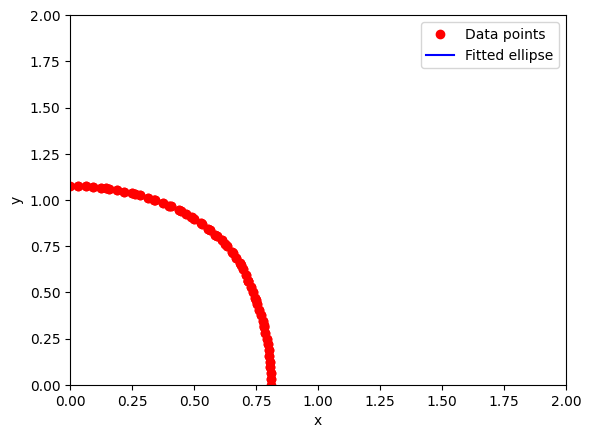

In [11]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Function to read the files
def readfile(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Extract x and y values from the file, filtering out invalid lines
    x = []
    y = []
    for line in lines:
        values = line.split()
        if len(values) == 2:  
            try:
                x_val = float(values[0])
                y_val = float(values[1])
                x.append(x_val)
                y.append(y_val)
            except ValueError:
                continue
    # Convert lists to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Ellipse equation
def ellipse_equation(params, x, y):
    xc, yc, a, b, theta = params
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    x_rot = cos_theta * (x - xc) + sin_theta * (y - yc)
    y_rot = -sin_theta * (x - xc) + cos_theta * (y - yc)
    return (x_rot / a)**2 + (y_rot / b)**2 - 1

# Objective function to minimize
def objective_function(params, x, y):
    return ellipse_equation(params, x, y)

# Fit ellipse to data points
def fit_ellipse(x, y):
    # Initial guess for the parameters
    x_m = np.mean(x)
    y_m = np.mean(y)
    initial_guess = [x_m, y_m, np.std(x), np.std(y), 0]
    
    # Minimize the objective function
    result = opt.least_squares(objective_function, initial_guess, args=(x, y))
    return result.x

# Plot the ellipse
def plot_ellipse(params, x, y):
    xc, yc, a, b, theta = params
    t = np.linspace(0, 2 * np.pi, 100)
    ellipse_x = xc + a * np.cos(t) * np.cos(theta) - b * np.sin(t) * np.sin(theta)
    ellipse_y = yc + a * np.cos(t) * np.sin(theta) + b * np.sin(t) * np.cos(theta)
    
    plt.figure()
    plt.xlim(0, 2)
    plt.ylim(0, 2)
    plt.plot(x, y, 'ro', label='Data points')
    plt.plot(ellipse_x, ellipse_y, 'b-', label='Fitted ellipse')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Example usage
filename = 'facet_2001'  # Replace with your filename
x, y = readfile(filename)
params = fit_ellipse(x, y)
plot_ellipse(params, x, y)